In [2]:
# !pip install pycaret

In [1]:
from pycaret.datasets import get_data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = df.drop('species',axis=1)
Y = df['species']

In [15]:
encode = LabelEncoder()
Y = encode.fit_transform(Y)

# CrossValidation

* KFold
* Cross_val_score
* Cross_validate

A crossvalidation pode ser observada de duas formas, uma delas sendo referente a apenas a validação de um modelo.

A crossvalidation, utiliza a estrátegia de testar samples dos dados, treinando com a outra parte deles, escolheremos em quantos pedaços dividiremos os dados, e informaremos o modelo a ser validado.

Antes da validação faz se necessário a **criação de um KFold**, responsável por definirmos em quantos pedaços quebraremos nosso dataset.


In [ ]:
kfold = KFold(10,random_state=1)

## cross_val_score
A cross_val_score é a função que fará a cross_validation, da **maneira mais simples** possível apenas fazendo a divisão das samples e trazendo o resultado de cada utilização dos modelos.

In [1]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(),X,Y,cv=kfold).mean()

0.9466666666666667

## cross_validate 
A cross_validate é a função de **cross_validation mais robusta**, pois exibirá além da validação, pode ser composta do tempo de execução, e receber um grid de parametros a serém substituidos no modelo.

In [ ]:
from sklearn.model_selection import cross_validate


In [ ]:
scores = ['precision_macro', 'recall_macro']
cross_validate(LogisticRegression(),X,Y,scoring=scores,cv=kfold)

{'fit_time': array([0.06637383, 0.07827783, 0.05891013, 0.05830073, 0.0613935 ,
        0.05582428, 0.06198049, 0.0576582 , 0.0620997 , 0.05237031]),
 'score_time': array([0.00532794, 0.00519276, 0.00517273, 0.00538754, 0.00528407,
        0.00558543, 0.00554037, 0.0055244 , 0.00496912, 0.00543475]),
 'test_precision_macro': array([1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 0.5, 0.5, 0.5]),
 'test_recall_macro': array([1.        , 1.        , 1.        , 1.        , 0.46666667,
        0.43333333, 1.        , 0.43333333, 0.43333333, 0.46666667])}

# Escolha De Parametros

Para escolher os parametros do seu modelo, será necessário uso de um metodo de Search, podendo ser o GridSearchCV ou o RandomizedSearchCV

**GridSearchCV**: Faz a execução de cada parametro de maneira 1 por 1

**RandomizedSearchCV**: Faz a execução de cada parametro de maneira aleatória.

Dentro deles será recebido o modelo para ser feito a escolha de parametros, junto a **param_grid**: dicionário de parametro e atributos para teste.

In [10]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param = {'intercept_scaling':[1,2,3]}
RandomizedSearchCV(LogisticRegression(),param_grid=param,cv=5)

In [ ]:
param = {'intercept_scaling':[1,2,3]}
GridSearchCV(LogisticRegression(),param_grid=param,cv=5)

# Principais Metricas

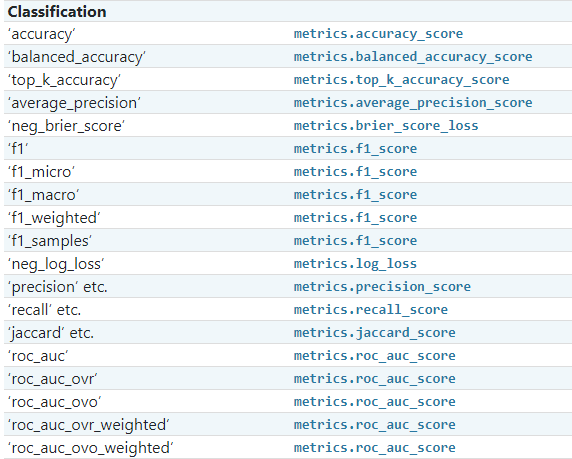

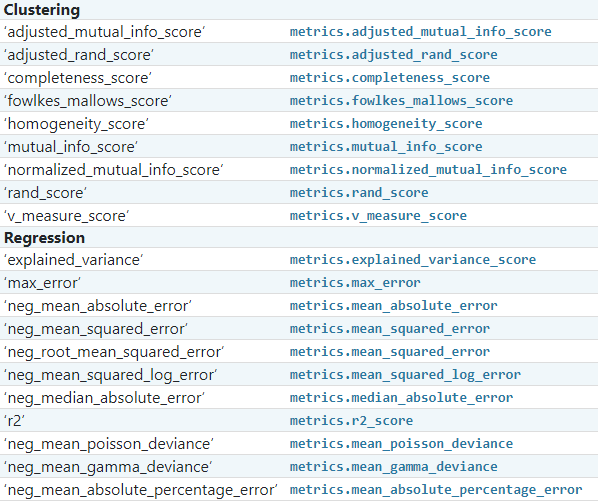

# Visualizações Dinamicas Metricas

* Confusion_matrix
* Classification_report
* Roc Score
* Learning e Validation Curve




In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)
modelo = LogisticRegression()
modelo.fit(x_train,y_train)

LogisticRegression()

## plot_decision_regions

In [20]:
from mlxtend.plotting import plot_decision_regions

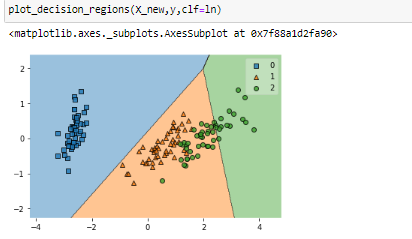

## Confusion_matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(modelo.predict(x_test),y_test)
cm

array([[12,  0,  0],
       [ 0, 10,  1],
       [ 0,  3, 12]])

Podemos usar o ConfusionMatrixDisplay para exibir os dados.

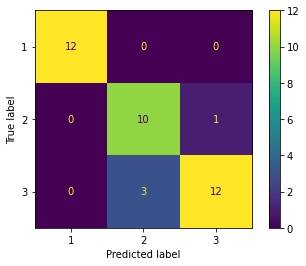

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,2,3])
plot.plot()

## Classification_report

**Precision Baixo** = Muitos falsos positivos, por exemplo uma detecção de spam (O que vale mais a pena? um spam como msg boa ou uma msg boa como spam?) calssificando como spam não sendo spam - True False 

**Recall Baixo** = Muitos falsos negativos, por exemplo uma detecção de fraude (vale a pena uma operação certa como fraude ou uma fraude como certa) classifica como não fraude uma fraude.

**F1** = Equilibrio Precision e Recall


In [26]:
from sklearn.metrics import classification_report

print(classification_report(modelo.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      0.91      0.83        11
           2       0.92      0.80      0.86        15

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.90        38



## Roc *Score*

In [37]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test,modelo.predict_proba(x_test),multi_class='ovr')
roc

0.9917948717948718

## Curvas De Aprendizado - Validação ...

### learning_curve

In [111]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, Y, train_sizes=[50,60,80,100,120], cv=5)

In [112]:
train_sizes

array([ 50,  60,  80, 100, 120])

In [113]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.97      , 0.98      , 0.99      , 1.        , 0.99      ],
       [0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333]])

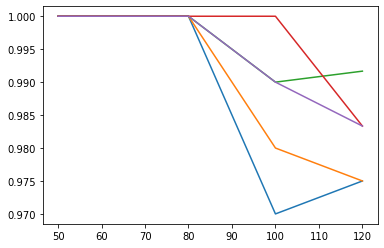

In [114]:
plt.plot(train_sizes,train_scores)
plt.show()

In [115]:
valid_scores

array([[0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667],
       [0.96666667, 1.        , 0.96666667, 0.9       , 1.        ],
       [0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]])

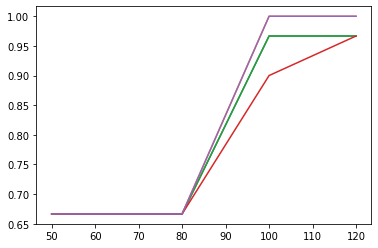

In [116]:
plt.plot(train_sizes,valid_scores)
plt.show()

### validation_curve

In [121]:
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(Ridge(), X, Y, param_name="alpha", param_range=np.logspace(-7, 3, 3), cv=5)

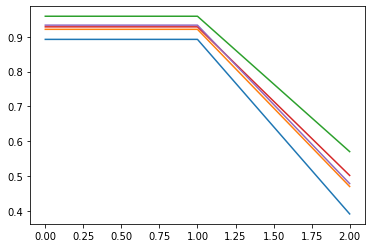

In [125]:
plt.plot(train_scores)
plt.show()

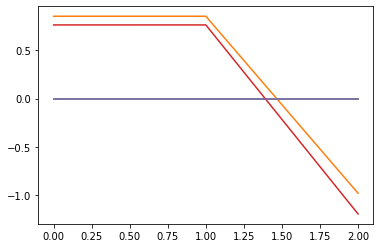

In [124]:
plt.plot(valid_scores)
plt.show()

# Feature Selection

* SelectKBest
* RFE
* SelectFromModel

A feature selection tem como objetivo decidir as melhores features para prever uma variavél target, podendo ser feita de diversas maneiras, com auxilio de outros modelos, com auxilio de testes estatísticos e com os resultados do proprio modelo.

## SelectKBest

**SelectKbest(score_func, k='numero de features')**:**texto em negrito**
Seleciona uma determinada quantidade de variáveis com base em um teste estatístico.

**Scores Func**

**For regression** > f_regression, mutual_info_regression

**For classification** > chi2, f_classif, mutual_info_classif


## SelectFromModel

Seleciona as features mais importantes de um determinado modelo.

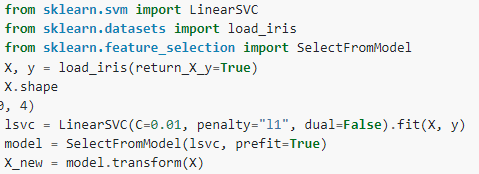

In [1]:
# VARIANCHE THRESHOLD

## Podemos Aplicar A Seleção De Features Dentro Da Pipeline 

A pipeline executará a seleção das features com **SelectFromModel** e então com as features selecionadas fará a classificação na **RandomForest**.

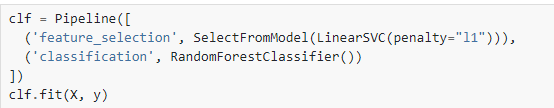